**Importing required libraries**

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

**Loading dataset**

In [64]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Checking for misising values in each column**

In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Drop column that have missing values more than 30%**

In [12]:
df.drop('deck',axis=1,inplace=True)

**Selecting input and output columns**

In [68]:
X = df[['pclass','age','fare','embarked','embark_town']]
y = df['survived']

**Splitting data into training and testing data**

In [69]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

**Imputing categorical columns by Simpler Imputer**

In [74]:
cat_imputer = SimpleImputer(strategy='most_frequent')
x_train[['embarked','embark_town']] = cat_imputer.fit_transform(x_train[['embarked','embark_town']])
x_test[['embarked','embark_town']] = cat_imputer.transform(x_test[['embarked','embark_town']])


**Imputing numeric columns by Iterative Imputer**

In [75]:
num_imputer = IterativeImputer()
x_train[['age','pclass','fare']] = num_imputer.fit_transform(x_train[['age','pclass','fare']])
x_test[['age','pclass','fare']] = num_imputer.transform(x_test[['age','pclass','fare']])

**Checking for missing values after imputation**

In [72]:
x_train.isna().sum()

pclass         0
age            0
fare           0
embarked       0
embark_town    0
dtype: int64

**Checking missing values by Heatmap**

<Axes: >

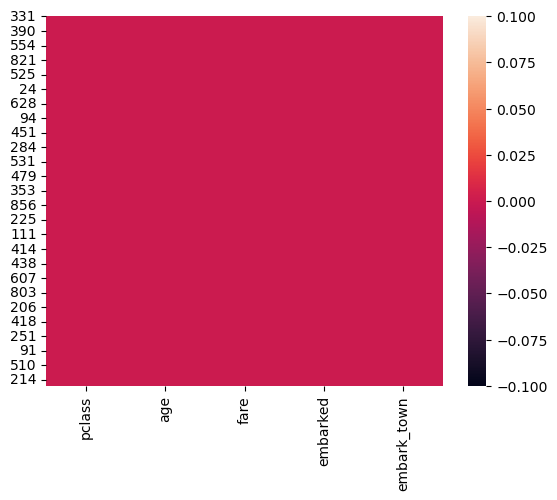

In [77]:
sns.heatmap(x_train.isna())